# DWDM Mini Project


Group 15 - <br>
    PG 03 Omkar Najan &nbsp; 		PRN NO. 1032180002 <br>
    PG 09 Mayur Pingle &nbsp; 		PRN NO. 10321800083<br>
    PG 13 Payal Patil &nbsp;		PRN NO. 1032180129<br>
    PG 14 Vaishnavi Salunke &nbsp;	PRN NO. 1032180146 <br>

Cars Data has Information about 3 brands/make of cars. Namely US, Japan, Europe. Target of the data set to find the brand of a car using the parameters such as horsepower, Cubic inches, Make year, etc.

A decision tree can be used create a predictive data model to predict the car brand.

In [1]:
!pip install pydot
#!pip install pydotplus

# data preprocessing  
import numpy as np
import itertools
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus
import pydot
from six import StringIO
from sklearn import tree
import matplotlib.image as mpimg
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# Accuracy Evolution
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings

print("Lib Imported")

Lib Imported


After Importng Libraries , We have to import dataset into dataframe using pandas 'read_csv' function.

In [2]:
df = pd.read_csv("cars.csv")

In [3]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


After checking dataset sample , we have to check shape , datatypes of coulmns, missing values , duplicate values etc. 

In [4]:
df.shape

(261, 8)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    int64  
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    int64  
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 16.4+ KB
None


In [6]:
df.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand'],
      dtype='object')

In [7]:
df.isnull()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
256,False,False,False,False,False,False,False,False
257,False,False,False,False,False,False,False,False
258,False,False,False,False,False,False,False,False
259,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [9]:
df.duplicated().value_counts()

False    261
dtype: int64

There are no dupicate values , null values in the dataset.

# Preprocessing 

Using <b>df</b> as the cars.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of df) </li>
    <li> <b> y </b> as the <b> response vector (target) </b> </li>
</ul>

In [10]:
X = df.iloc[:,:7]
X.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


In [11]:
X.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.708812,106.360153,3018.172414,15.547893,1976.819923
std,7.823570,1.733310,109.070194,40.499959,852.680180,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,98.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3672.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [12]:
X_array = X.values
X_array[:5]

array([[1.400e+01, 8.000e+00, 3.500e+02, 1.650e+02, 4.209e+03, 1.200e+01,
        1.972e+03],
       [3.190e+01, 4.000e+00, 8.900e+01, 7.100e+01, 1.925e+03, 1.400e+01,
        1.980e+03],
       [1.700e+01, 8.000e+00, 3.020e+02, 1.400e+02, 3.449e+03, 1.100e+01,
        1.971e+03],
       [1.500e+01, 8.000e+00, 4.000e+02, 1.500e+02, 3.761e+03, 1.000e+01,
        1.971e+03],
       [3.050e+01, 4.000e+00, 9.800e+01, 6.300e+01, 2.051e+03, 1.700e+01,
        1.978e+03]])

In [13]:
Y = df.iloc[: , -1]
Y.head()

0         US.
1     Europe.
2         US.
3         US.
4         US.
Name: brand, dtype: object

In [14]:
Y_array = Y.values
Y_array[:5]

array([' US.', ' Europe.', ' US.', ' US.', ' US.'], dtype=object)

Values in target vectors are non Integer values. To convrt these categorical values into dummy / indicator values format we use 'preprocessing' from 'sklearn' 
and transform and fit to get dummy values.

In [15]:
labelencoder_y = preprocessing.LabelEncoder()
Y_encoded = labelencoder_y.fit_transform(Y)
print(Y_encoded)

[2 0 2 2 2 2 2 2 0 1 1 0 2 2 2 2 1 2 1 0 1 0 2 2 1 1 1 2 2 2 1 2 1 2 1 2 0
 1 2 2 2 2 2 2 2 1 2 2 0 2 2 0 2 0 2 2 1 2 0 2 2 1 1 1 2 2 0 1 0 2 2 2 1 1
 0 2 2 1 0 1 2 2 2 0 0 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 0 0 2 1
 0 2 1 0 2 2 2 2 2 0 0 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2 0 0 2 1 1 1 2 0 2 2
 2 2 1 1 2 2 0 2 1 1 2 0 2 2 2 2 0 2 2 2 1 2 1 0 0 2 2 0 2 2 2 1 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 0 0 1 0 2 2 2 2 2 1 2 2 1 1 2 1 0 2 1 1 2 2 2 2 0
 2 0 2 1 2 1 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 0 2 2 2 0 1 2 2 0 0 2 2 1 2 1 2
 2 2]


<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>


Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_train, X_test, y_train, y_test <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.25, and random_state=4. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X_array,Y_encoded,test_size = 0.25,random_state=4)

<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>classifier</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>

In [17]:
classifer =  DecisionTreeClassifier(criterion = 'entropy' , max_depth=6)

Next, we will fit the data with the training feature matrix <b> X_train </b> and training  response vector <b> y_train </b>

In [18]:
classifer.fit(X_train ,Y_train )

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    <ul>
        <li>Let's make some predictions on the <strong>testing dataset</strong> and store it into a variable called <strong>Y_pred</strong>.</li>
        <li>Let's make some predictions on the <strong>train dataset</strong> and store it into a variable called <strong>Y_pred_train</strong>.</li>
    </ul>
    
</div>

In [19]:
Y_pred = classifer.predict(X_test)
Y_pred
Y_pred_train = classifer.predict(X_train)

<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>

[[ 7  5  1]
 [ 2  9  0]
 [ 4  3 35]]


<AxesSubplot:>

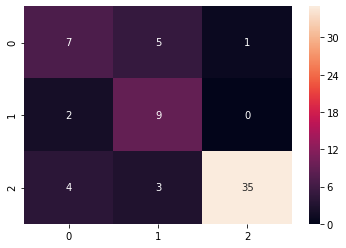

In [20]:
cm = confusion_matrix(Y_test ,Y_pred )
print(cm)
sns.heatmap(cm, annot=True)

To Calculate Training Accuracy And testig accuracy , we need to preict values accordingly

In [21]:
# Testing Accuracy
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, Y_pred)*100)

DecisionTrees's Accuracy:  77.27272727272727


In [22]:
acc_tree =  metrics.accuracy_score(Y_train, Y_pred_train)*100
acc_test_tree =  metrics.accuracy_score(Y_test, Y_pred)*100

In [23]:
print("report : " ,metrics.classification_report(Y_test , Y_pred))

report :                precision    recall  f1-score   support

           0       0.54      0.54      0.54        13
           1       0.53      0.82      0.64        11
           2       0.97      0.83      0.90        42

   micro avg       0.77      0.77      0.77        66
   macro avg       0.68      0.73      0.69        66
weighted avg       0.81      0.77      0.78        66



<hr>

<div id="visualization">
    <h2>Visualization</h2>
    Lets visualize the tree
</div>

In [24]:
df.columns[0:7]

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year'],
      dtype='object')

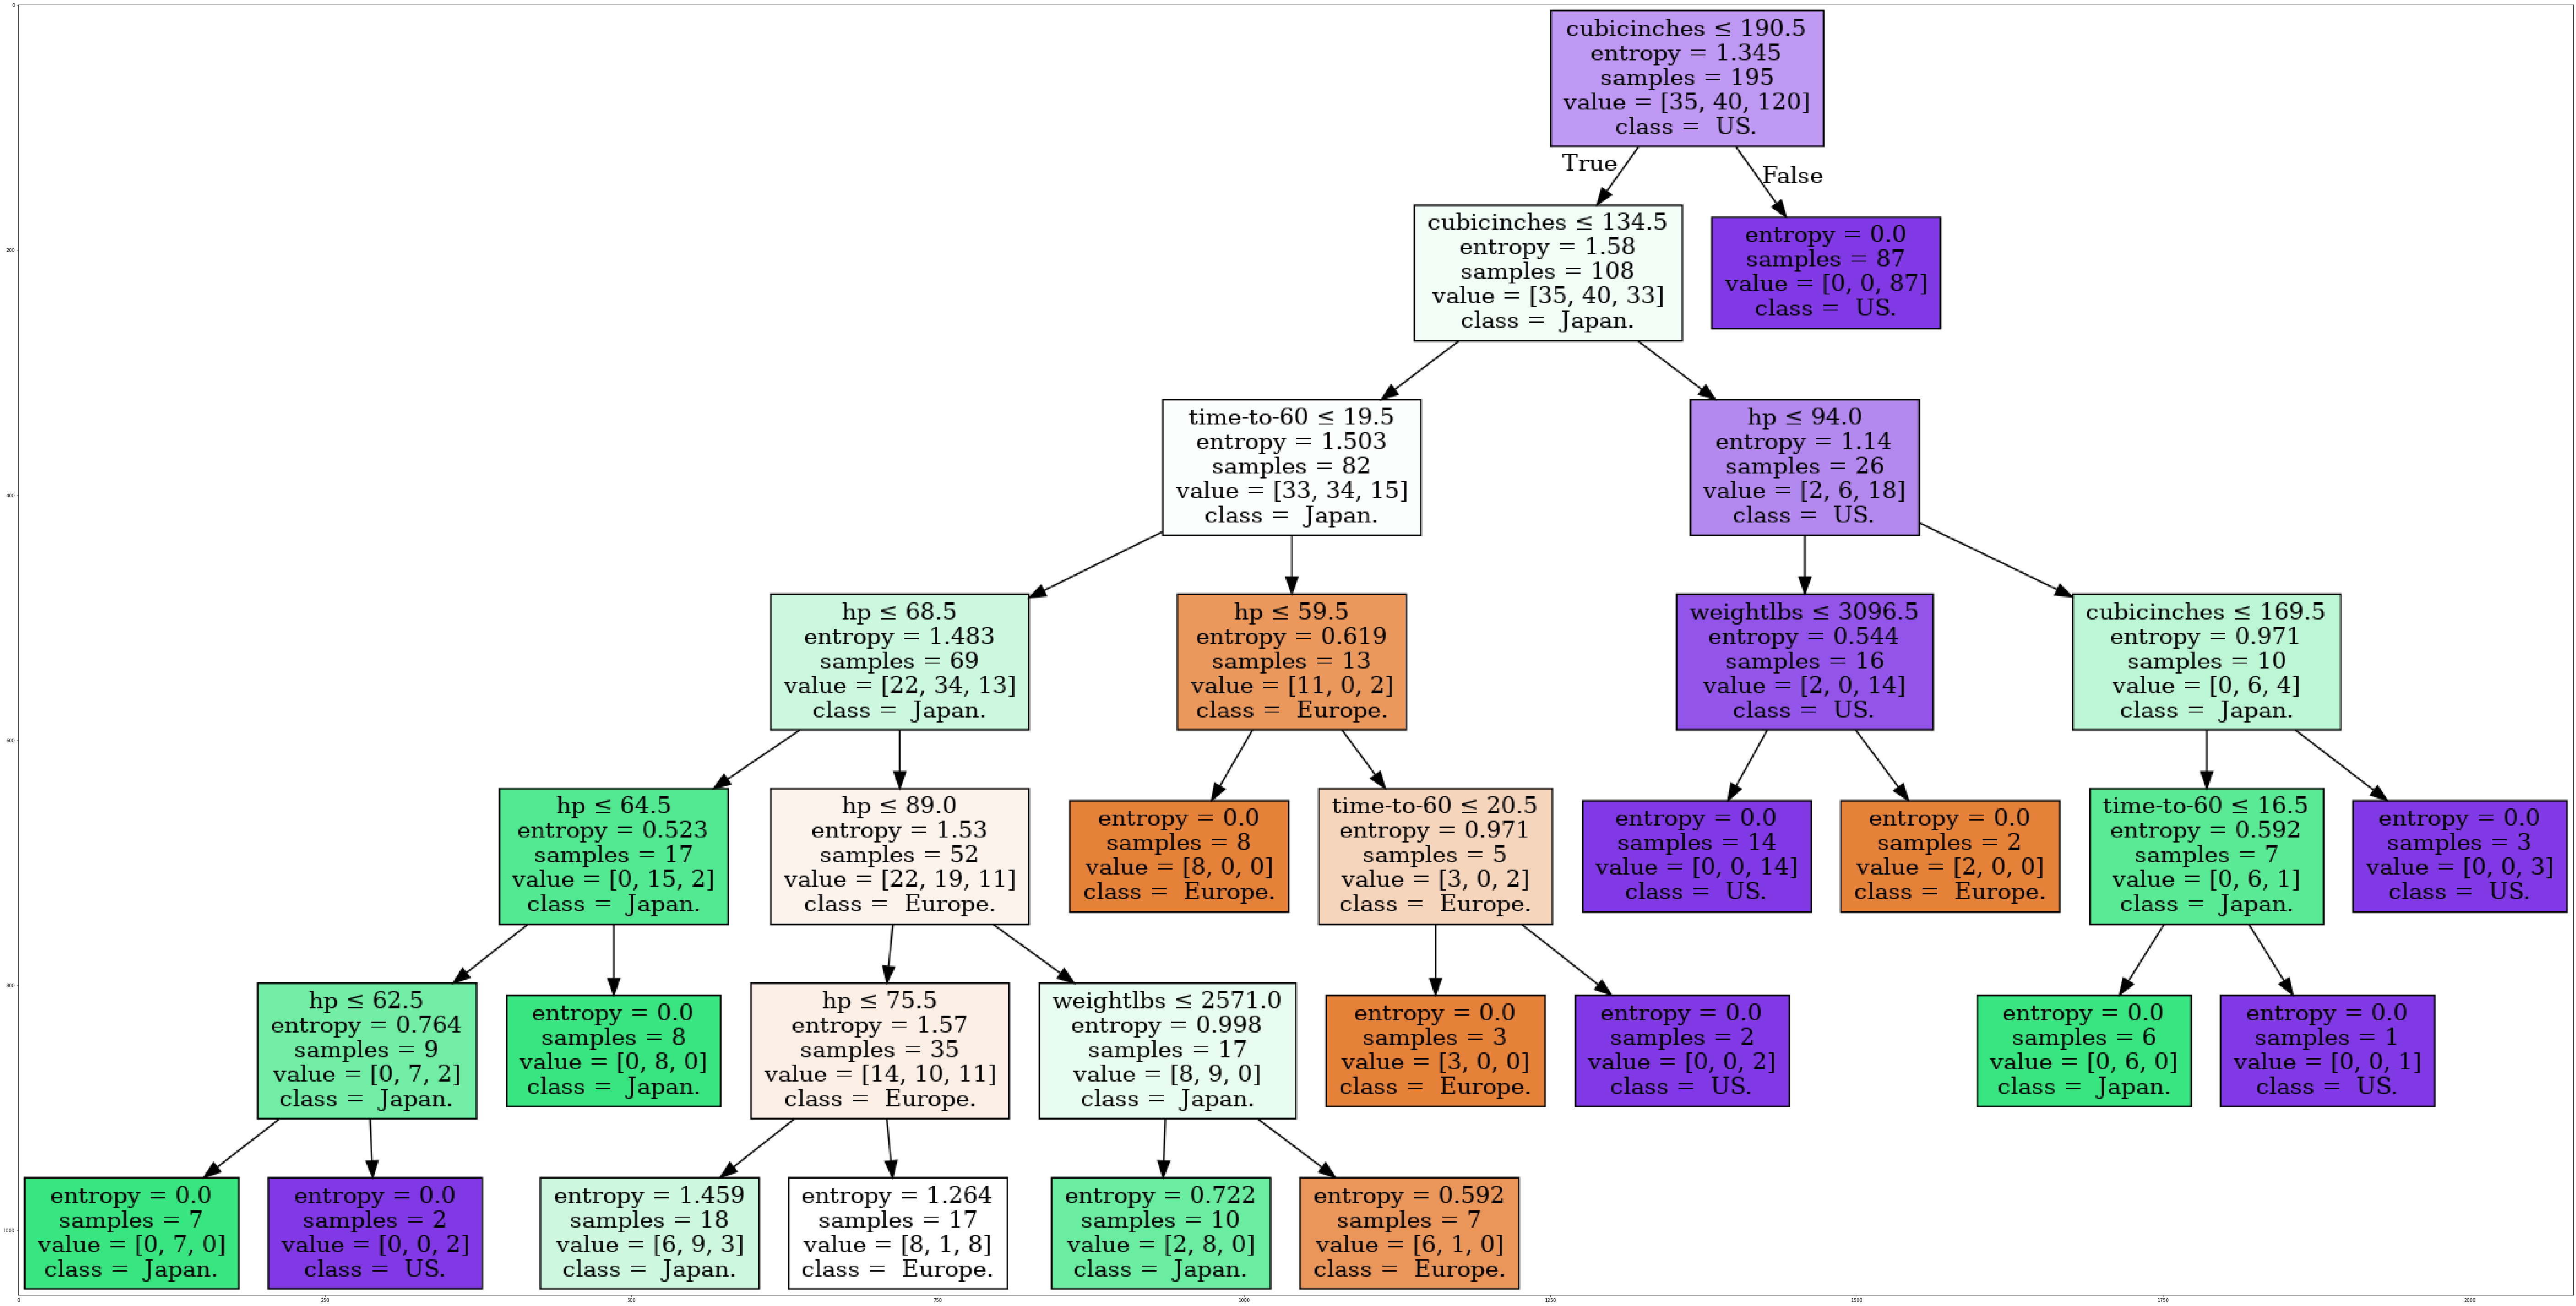

In [25]:
dot_data = StringIO()
filename = "miniProject.png"
featureNames = df.columns[0:7]
targetNames = df["brand"].unique().tolist()
out=tree.export_graphviz(classifer,feature_names=featureNames, out_file=dot_data, class_names= np.unique(Y), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

<hr>

# K-Means

# Preprocessing 

Using <b>df</b> as the cars.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of df) </li>
    <li> <b> Y </b> as the <b> response vector (target) </b> </li>
</ul>

In [26]:
X = df.iloc[:,:7]

In [27]:
X.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


In [28]:
X1_array = X.values  
X1_array

array([[1.400e+01, 8.000e+00, 3.500e+02, ..., 4.209e+03, 1.200e+01,
        1.972e+03],
       [3.190e+01, 4.000e+00, 8.900e+01, ..., 1.925e+03, 1.400e+01,
        1.980e+03],
       [1.700e+01, 8.000e+00, 3.020e+02, ..., 3.449e+03, 1.100e+01,
        1.971e+03],
       ...,
       [2.200e+01, 6.000e+00, 2.320e+02, ..., 2.835e+03, 1.500e+01,
        1.983e+03],
       [1.800e+01, 6.000e+00, 2.320e+02, ..., 3.288e+03, 1.600e+01,
        1.972e+03],
       [2.200e+01, 6.000e+00, 2.500e+02, ..., 3.353e+03, 1.500e+01,
        1.977e+03]])

In [29]:
X.corr()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
mpg,1.000000,-0.776710,-0.800680,-0.774905,-0.820956,0.509070,0.550441
cylinders,-0.776710,1.000000,0.948757,0.845155,0.889617,-0.578161,-0.322239
cubicinches,-0.800680,0.948757,1.000000,0.906352,0.918548,-0.610410,-0.352590
hp,-0.774905,0.845155,0.906352,1.000000,0.846580,-0.744873,-0.383869
weightlbs,-0.820956,0.889617,0.918548,0.846580,1.000000,-0.466747,-0.280226
time-to-60,0.509070,-0.578161,-0.610410,-0.744873,-0.466747,1.000000,0.312311
year,0.550441,-0.322239,-0.352590,-0.383869,-0.280226,0.312311,1.000000


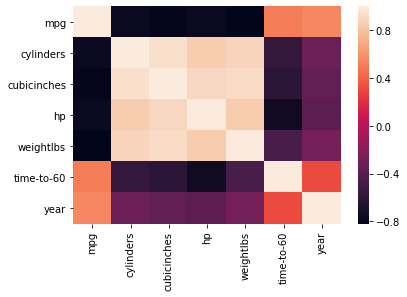

In [30]:
df.corr(method="pearson")
sns.heatmap(df.corr(method="pearson"))
plt.show()

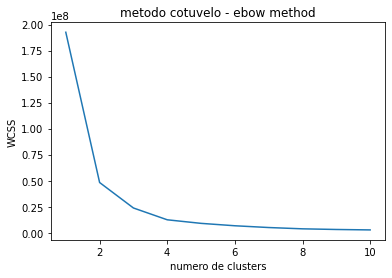

In [31]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_array)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('metodo cotuvelo - ebow method')
plt.xlabel('numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans =  kmeans.fit_predict(X_array)
print(kmeans.fit_predict(X_array))


[2 1 0 2 1 2 2 2 0 1 1 1 2 0 2 2 1 0 1 1 1 1 0 2 1 1 1 2 0 1 1 0 1 0 1 0 1
 1 2 0 2 2 0 0 0 1 2 1 1 0 2 0 0 1 2 2 0 1 1 2 0 1 0 1 2 0 1 1 1 2 0 1 1 1
 1 0 0 1 1 1 2 2 0 1 1 1 0 0 1 1 1 1 2 0 1 2 2 0 2 2 2 2 1 1 1 1 1 1 1 0 1
 0 2 1 1 2 1 0 1 2 1 1 2 1 1 1 2 1 1 1 1 1 2 0 2 2 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 1 2 0 1 0 1 1 1 0 0 2 0 0 1 0 0 1 0 1 1 0 0 1 1 1 2 0 0 1 0 1 2 0 1
 0 0 2 2 2 1 1 2 2 2 1 1 1 1 1 1 1 0 0 1 2 1 0 2 0 0 0 1 1 0 1 1 2 1 2 0 0
 2 2 2 1 2 1 1 0 0 1 1 2 0 1 2 0 1 1 2 0 2 1 2 0 0 1 1 1 1 1 0 2 1 1 2 1 0
 0 0]


In [33]:
cars = df

In [34]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
cars['clusters'] = kmeans.fit_predict(X_array)
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,clusters
0,14.0,8,350,165,4209,12,1972,US.,2
1,31.9,4,89,71,1925,14,1980,Europe.,1
2,17.0,8,302,140,3449,11,1971,US.,0
3,15.0,8,400,150,3761,10,1971,US.,2
4,30.5,4,98,63,2051,17,1978,US.,1


In [35]:
X1 = df[['cylinders' , 'cubicinches']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

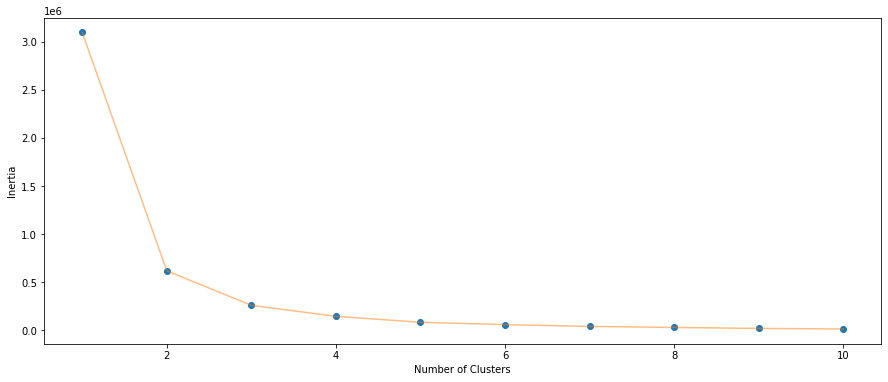

In [36]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [37]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [38]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

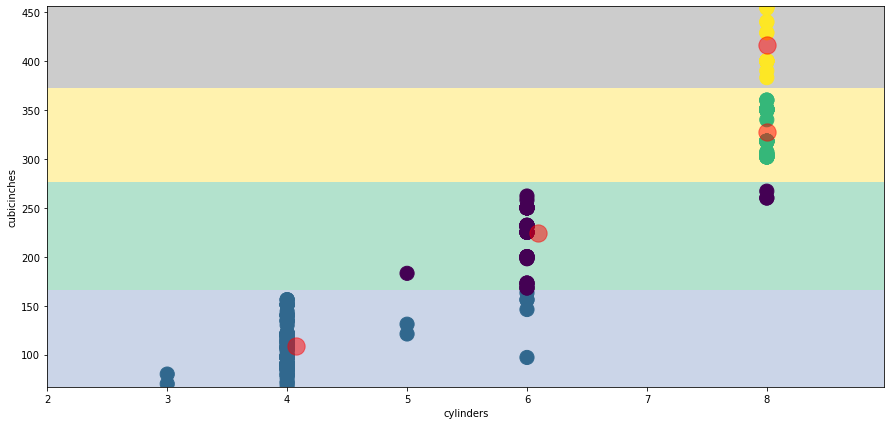

In [39]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'cylinders' ,y = 'cubicinches' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('cubicinches') , plt.xlabel('cylinders')
plt.show()

<hr>

# KNN

Importing Libraries for K Nearest Neighbors

In [40]:
%matplotlib inline

In [41]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand,clusters
0,14.0,8,350,165,4209,12,1972,US.,2
1,31.9,4,89,71,1925,14,1980,Europe.,1
2,17.0,8,302,140,3449,11,1971,US.,0
3,15.0,8,400,150,3761,10,1971,US.,2
4,30.5,4,98,63,2051,17,1978,US.,1


# Data Analysis And Visualization

In [42]:
df['brand'].value_counts()

 US.        162
 Japan.      51
 Europe.     48
Name: brand, dtype: int64

array([[<AxesSubplot:title={'center':'mpg'}>]], dtype=object)

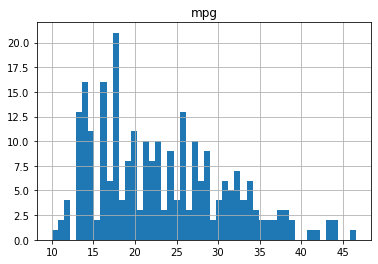

In [43]:
df.hist(column='mpg', bins=50)

In [44]:
df.columns

Index(['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60',
       'year', 'brand', 'clusters'],
      dtype='object')

# Preprocessing 

Using <b>df</b> as the cars.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of df) </li>
    <li> <b> y </b> as the <b> response vector (target) </b> </li>
</ul>

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [45]:
X = df.iloc[:,:7].values
X[:5]

array([[1.400e+01, 8.000e+00, 3.500e+02, 1.650e+02, 4.209e+03, 1.200e+01,
        1.972e+03],
       [3.190e+01, 4.000e+00, 8.900e+01, 7.100e+01, 1.925e+03, 1.400e+01,
        1.980e+03],
       [1.700e+01, 8.000e+00, 3.020e+02, 1.400e+02, 3.449e+03, 1.100e+01,
        1.971e+03],
       [1.500e+01, 8.000e+00, 4.000e+02, 1.500e+02, 3.761e+03, 1.000e+01,
        1.971e+03],
       [3.050e+01, 4.000e+00, 9.800e+01, 6.300e+01, 2.051e+03, 1.700e+01,
        1.978e+03]])

Some values in target vectors are non Integer values. To convrt these categorical values into dummy / indicator values format we use 'preprocessing' from 'sklearn' and transform and fit to get dummy values

In [46]:
labelencoder_y = preprocessing.LabelEncoder()
Y_encoded = labelencoder_y.fit_transform(Y)
print(Y_encoded)

[2 0 2 2 2 2 2 2 0 1 1 0 2 2 2 2 1 2 1 0 1 0 2 2 1 1 1 2 2 2 1 2 1 2 1 2 0
 1 2 2 2 2 2 2 2 1 2 2 0 2 2 0 2 0 2 2 1 2 0 2 2 1 1 1 2 2 0 1 0 2 2 2 1 1
 0 2 2 1 0 1 2 2 2 0 0 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 0 0 2 1
 0 2 1 0 2 2 2 2 2 0 0 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2 0 0 2 1 1 1 2 0 2 2
 2 2 1 1 2 2 0 2 1 1 2 0 2 2 2 2 0 2 2 2 1 2 1 0 0 2 2 0 2 2 2 1 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 0 0 1 0 2 2 2 2 2 1 2 2 1 1 2 1 0 2 1 1 2 2 2 2 0
 2 0 2 1 2 1 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 0 2 2 2 0 1 2 2 0 0 2 2 1 2 1 2
 2 2]


In [47]:
Y = df.iloc[: , -1].values
Y[:5]

array([2, 1, 0, 2, 1], dtype=int32)

## Normalize Data
Data Standardization give data zero mean and unit variance

In [48]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.17112732,  1.39305285,  1.37139218,  1.45068065,  1.39925317,
        -1.22128734, -1.32753906],
       [ 1.12122635, -0.91910482, -1.02615964, -0.87476849, -1.28450582,
        -0.53282946,  0.8758803 ],
       [-0.78693397,  1.39305285,  0.93046311,  0.83221013,  0.50623354,
        -1.56551627, -1.60296648],
       [-1.04306287,  1.39305285,  1.83069329,  1.07959834,  0.8728416 ,
        -1.90974521, -1.60296648],
       [ 0.94193612, -0.91910482, -0.94348544, -1.07267905, -1.13645256,
         0.49985734,  0.32502546]])

## Train Test Split
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [49]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (208, 7) (208,)
Test set: (53, 7) (53,)


<div id="classification">
    <h2>Classification</h2>
</div>
<div>
    <h3>K nearest neighbor (KNN)</h3>
    <h4>Import library </h4>
</div>
Classifier implementing the k-nearest neighbors vote.

In [50]:
from sklearn.neighbors import KNeighborsClassifier

### Training

Lets start the algorithm with k=4 for now:

In [51]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

### Predicting
we can use the model to predict the test set:

In [52]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 1, 0, 1, 2], dtype=int32)

### Accuracy evaluation
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [53]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train))*100)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat)*100)

Train set Accuracy:  94.71153846153845
Test set Accuracy:  90.56603773584906


#### What about other K?
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.


In [54]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


#### Plot  model accuracy  for Different number of Neighbors 

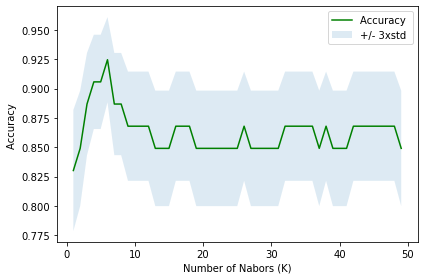

In [55]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.15)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [56]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9245283018867925 with k= 6


In [57]:
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print(neigh)
yhat = neigh.predict(X_test)
print(yhat[0:5])

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
acc_knn =  metrics.accuracy_score(y_train, neigh.predict(X_train))*100
acc_knn_test = metrics.accuracy_score(y_test, yhat)*100

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')
[2 1 1 1 2]
Train set Accuracy:  0.9326923076923077
Test set Accuracy:  0.9245283018867925


In [58]:
models = pd.DataFrame({
       'Model': [
              'Decision Tree Classifier',
              'k-Nearest Neighbors'
                ],
    
    'Score_train': [
                    acc_tree , acc_knn 
              ],
    'Score_test': [ acc_test_tree , acc_knn_test
             ]
                    })

In [59]:
models

,Model,Score_train,Score_test
0,Decision Tree Classifier,89.230769,77.272727
1,k-Nearest Neighbors,93.269231,92.452830


<br>
<div id = "conclusion">
    <p>Training accuracy of Decision tree and KNN is <strong>89.230769</strong> and <strong>93.269231</strong> respectively.</p>
    <p>Testing accuracy of Decision tree and KNN is <strong>77.272727</strong> and <strong>92.452830</strong> respectively.</p>
</div>

In [60]:
models.sort_values(by=['Score_test', 'Score_train'], ascending=False)

,Model,Score_train,Score_test
1,k-Nearest Neighbors,93.269231,92.452830
0,Decision Tree Classifier,89.230769,77.272727


In [61]:
models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])
models.sort_values(by=['Score_diff'], ascending=True)

,Model,Score_train,Score_test,Score_diff
1,k-Nearest Neighbors,93.269231,92.452830,0.816401
0,Decision Tree Classifier,89.230769,77.272727,11.958042


<br>
<hr>
<div id = "conclusion">
    <h4>Conclusion</h4>
    <p>For a given dataset , cars.csv <strong>K-Nearest-Neighbors</strong> is suitable algorithm for predicting brands of Cars with training accuracy 93% and testing accuracy 92%</p>
    <p>Decision tree algorithm does not have good accuracy score in both training and testing dataset.</p>
</div>